In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "piemonte"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,15.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,1,Piemonte,2,0,2,0,2,-1,-1,...,0.0,0.0,0.0,-1.0,0.00,100.00,-inf,0.00,0.00,-33.33
3,2020-02-28T18:00:00,1,Piemonte,7,0,7,4,11,9,9,...,0.0,71.0,0.0,4.0,0.00,63.64,12.68,0.00,0.00,450.00
4,2020-02-29T17:00:00,1,Piemonte,7,0,7,4,11,0,0,...,0.0,81.0,0.0,0.0,0.00,63.64,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2020-12-19T17:00:00,1,Piemonte,3437,234,3671,34922,38593,-2707,638,...,38.0,10421.0,2410.0,-2619.0,6.37,9.51,6.12,26.47,-3.70,-6.55
299,2020-12-20T17:00:00,1,Piemonte,3389,221,3610,34481,38091,-502,829,...,29.0,5269.0,2243.0,-441.0,6.12,9.48,15.73,36.96,-5.56,-1.30
300,2020-12-21T17:00:00,1,Piemonte,3409,230,3639,34318,37957,-134,611,...,43.0,5838.0,2247.0,-163.0,6.32,9.59,10.47,27.19,4.07,-0.35
301,2020-12-22T17:00:00,1,Piemonte,3331,228,3559,33350,36909,-1048,542,...,50.0,6894.0,2718.0,-968.0,6.41,9.64,7.86,19.94,-0.87,-2.76


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 933
Nuovi tamponi: 8946.0
Percentuale nuovi positivi/nuovi tamponi: 10.4 %
Nuovi guariti: 1223.0
Nuovi deceduti: 58.0
Variazione positivi ricoverati con sintomi: -92.0
Variazione positivi in terapia intensiva: -13.0
Variazione positivi in isolamento dimiciliare: -243.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-24T17:00:00,1,Piemonte,1483,88,1571,16272,17843,1381,1548,...,12.0,11847.0,8957.0,1256.0,5.60,8.80,13.07,17.28,4.76,8.39
1,2020-10-25T17:00:00,1,Piemonte,1601,94,1695,18182,19877,2034,2287,...,11.0,12657.0,10675.0,1910.0,5.55,8.53,18.07,21.42,6.82,11.40
2,2020-10-26T17:00:00,1,Piemonte,1849,102,1951,19316,21267,1390,1625,...,14.0,11367.0,7709.0,1134.0,5.23,9.17,14.30,21.08,8.51,6.99
3,2020-10-27T17:00:00,1,Piemonte,2016,121,2137,21103,23240,1973,2458,...,13.0,12547.0,10793.0,1787.0,5.66,9.20,19.59,22.77,18.63,9.28
4,2020-10-28T17:00:00,1,Piemonte,2237,135,2372,23415,25787,2547,2827,...,19.0,16673.0,13926.0,2312.0,5.69,9.20,16.96,20.30,11.57,10.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-19T17:00:00,1,Piemonte,3437,234,3671,34922,38593,-2707,638,...,38.0,10421.0,2410.0,-2619.0,6.37,9.51,6.12,26.47,-3.70,-6.55
57,2020-12-20T17:00:00,1,Piemonte,3389,221,3610,34481,38091,-502,829,...,29.0,5269.0,2243.0,-441.0,6.12,9.48,15.73,36.96,-5.56,-1.30
58,2020-12-21T17:00:00,1,Piemonte,3409,230,3639,34318,37957,-134,611,...,43.0,5838.0,2247.0,-163.0,6.32,9.59,10.47,27.19,4.07,-0.35
59,2020-12-22T17:00:00,1,Piemonte,3331,228,3559,33350,36909,-1048,542,...,50.0,6894.0,2718.0,-968.0,6.41,9.64,7.86,19.94,-0.87,-2.76


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

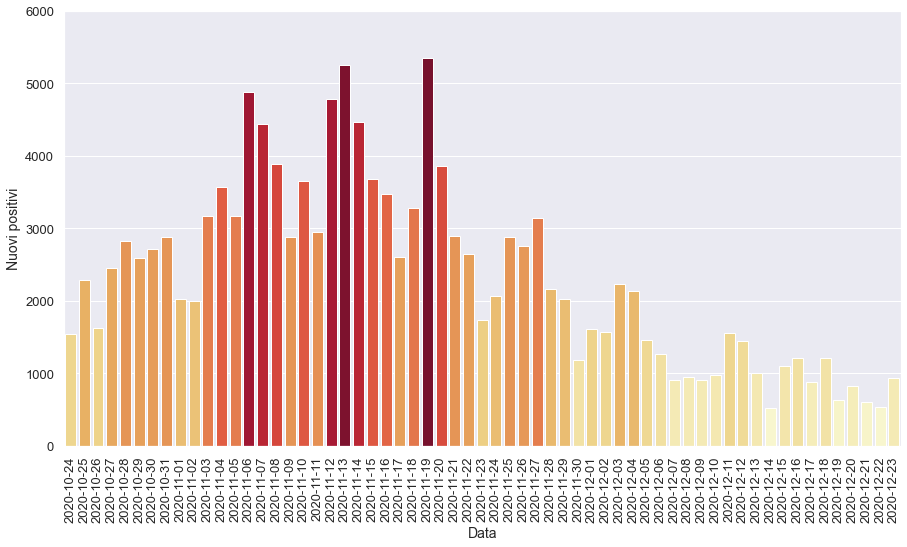

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

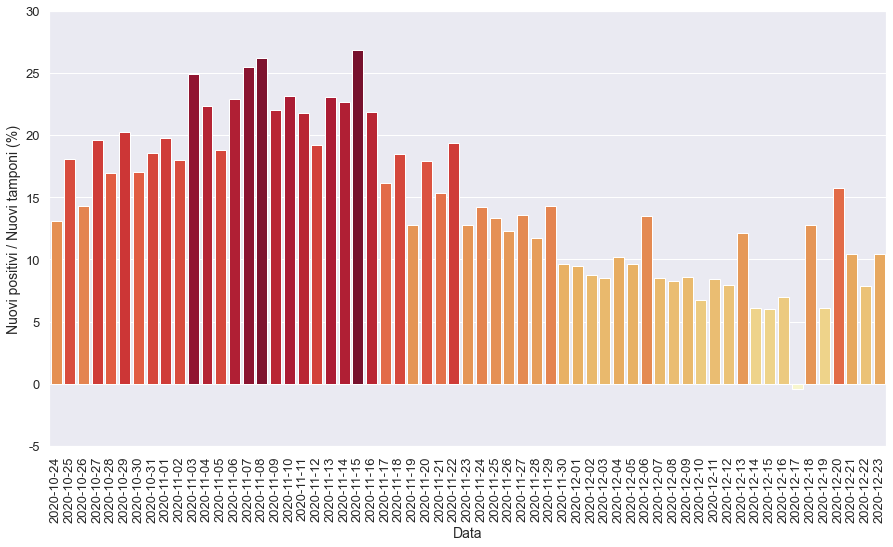

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

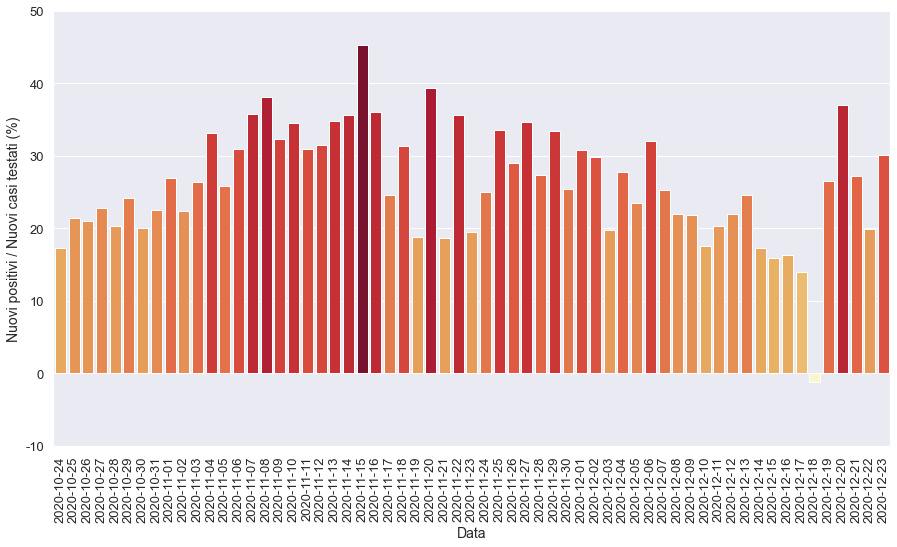

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

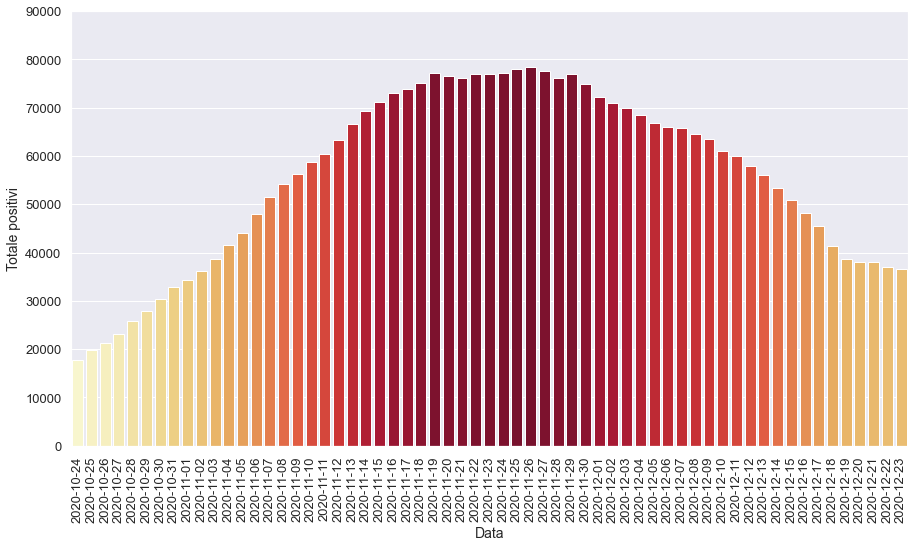

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

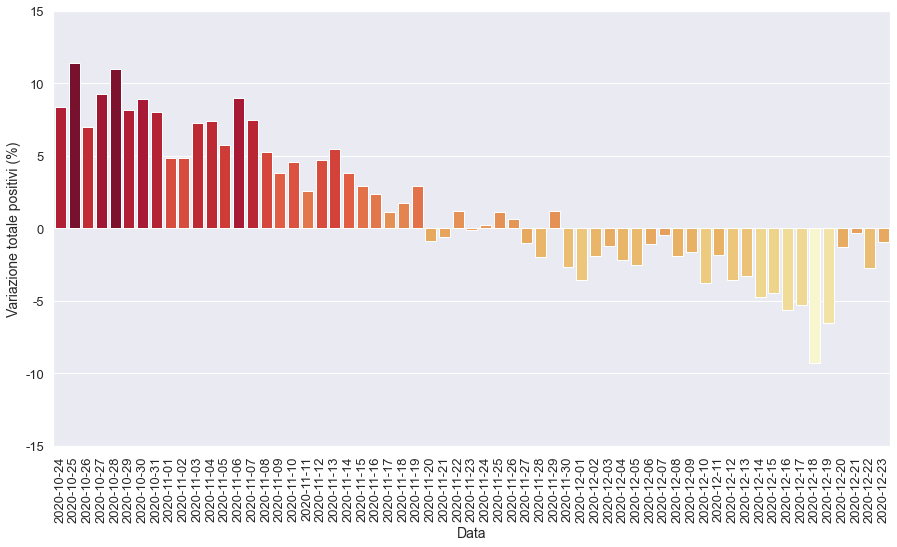

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

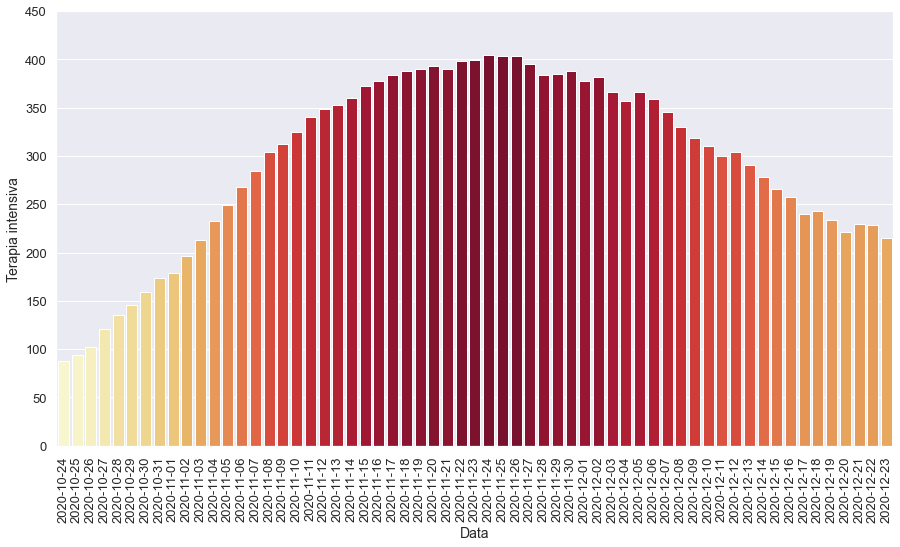

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

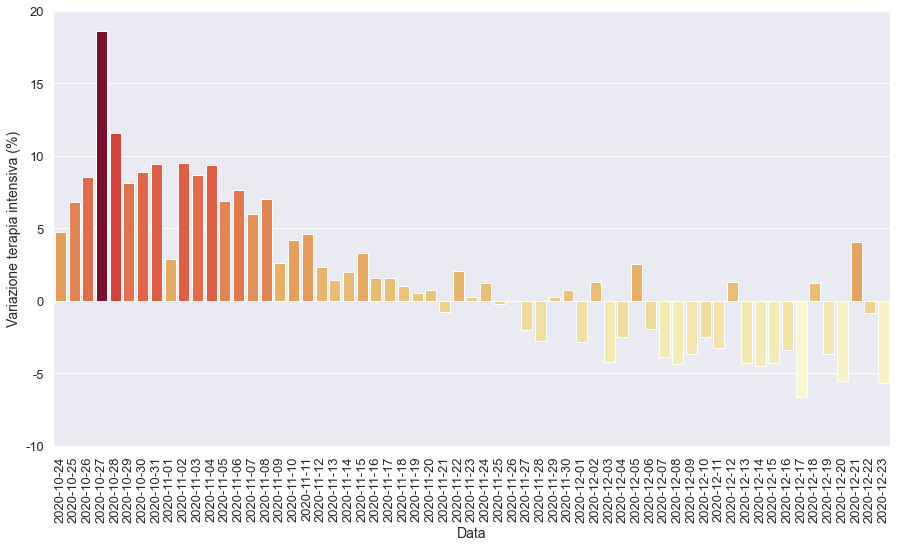

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

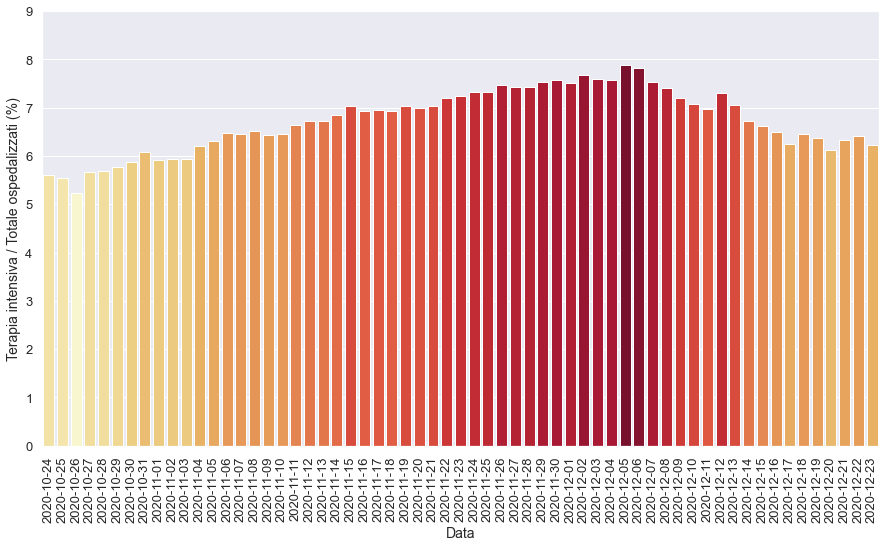

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

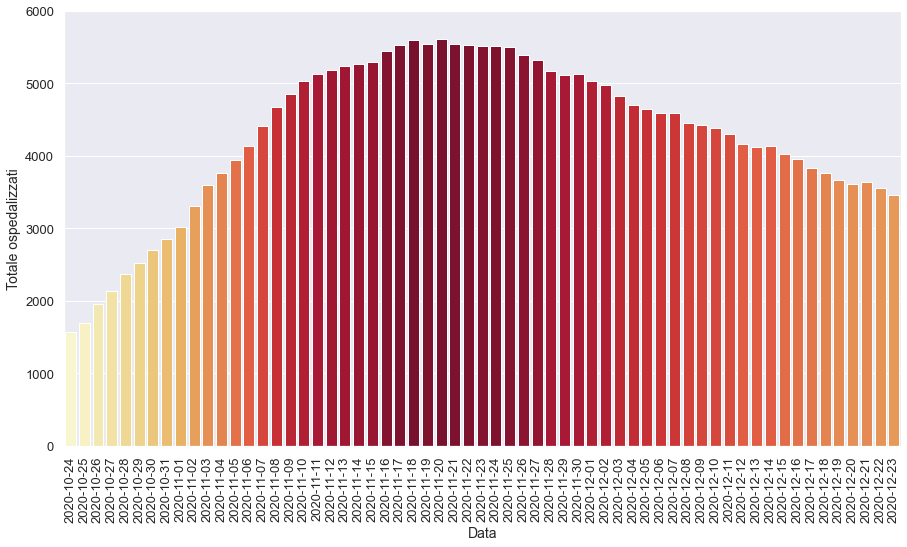

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

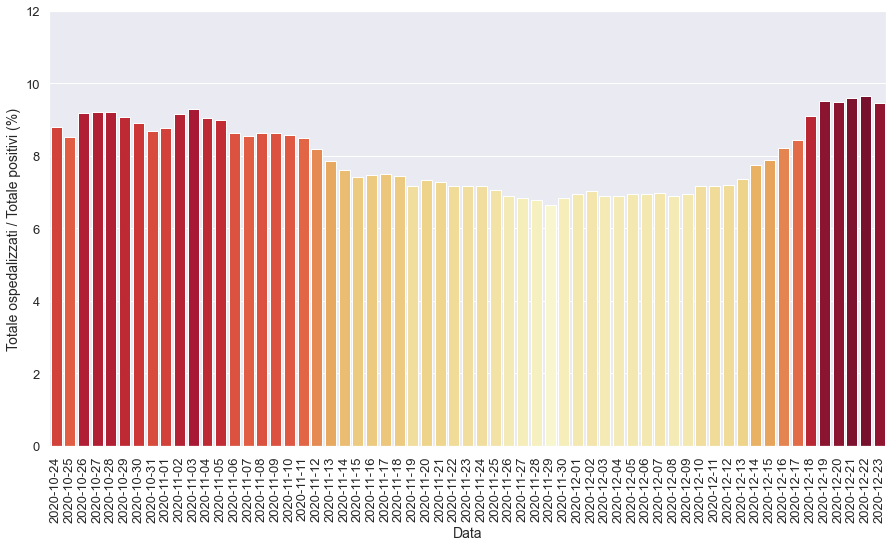

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

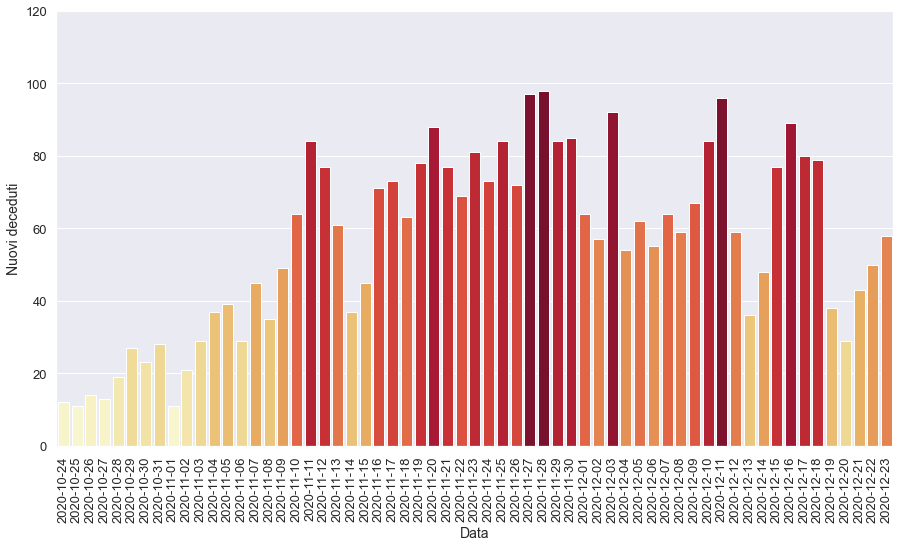

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

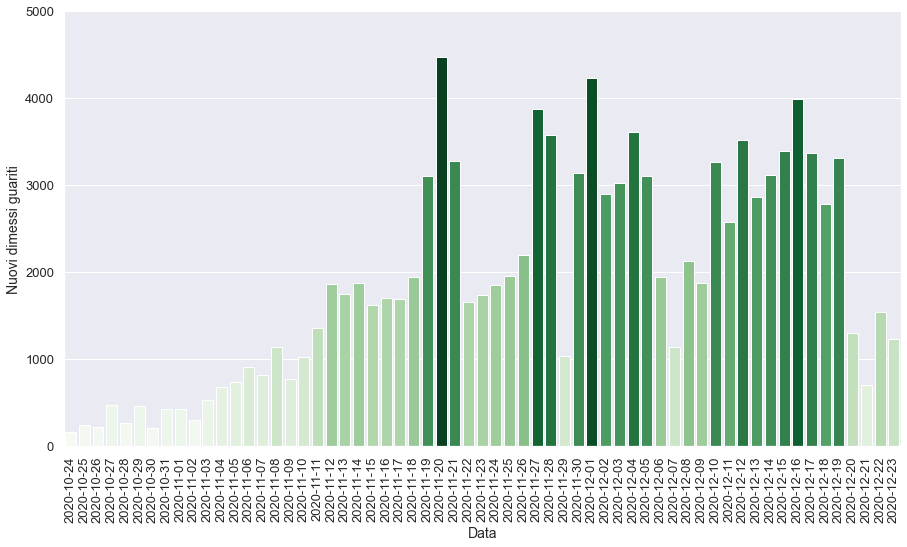

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-23T17:00:00,1,Piemonte,5112,399,5511,71412,76923,-89,1730,...,81.0,13529.0,8887.0,-70.0,7.24,7.16,12.79,19.47,0.25,-0.12
1,2020-11-24T17:00:00,1,Piemonte,5116,404,5520,71555,77075,152,2070,...,73.0,14536.0,8282.0,143.0,7.32,7.16,14.24,24.99,1.25,0.20
2,2020-11-25T17:00:00,1,Piemonte,5095,403,5498,72423,77921,846,2878,...,84.0,21540.0,8576.0,868.0,7.33,7.06,13.36,33.56,-0.25,1.10
3,2020-11-26T17:00:00,1,Piemonte,4992,403,5395,73011,78406,485,2751,...,72.0,22418.0,9485.0,588.0,7.47,6.88,12.27,29.00,0.00,0.62
4,2020-11-27T17:00:00,1,Piemonte,4922,395,5317,72272,77589,-817,3149,...,97.0,23141.0,9094.0,-739.0,7.43,6.85,13.61,34.63,-1.99,-1.04
5,2020-11-28T17:00:00,1,Piemonte,4781,384,5165,70912,76077,-1512,2157,...,98.0,18434.0,7886.0,-1360.0,7.43,6.79,11.70,27.35,-2.78,-1.95
6,2020-11-29T17:00:00,1,Piemonte,4734,385,5119,71865,76984,907,2021,...,84.0,14157.0,6038.0,953.0,7.52,6.65,14.28,33.47,0.26,1.19
7,2020-11-30T17:00:00,1,Piemonte,4737,388,5125,69818,74943,-2041,1185,...,85.0,12290.0,4652.0,-2047.0,7.57,6.84,9.64,25.47,0.78,-2.65
8,2020-12-01T17:00:00,1,Piemonte,4652,377,5029,67240,72269,-2674,1617,...,64.0,17016.0,5239.0,-2578.0,7.50,6.96,9.50,30.86,-2.84,-3.57
9,2020-12-02T17:00:00,1,Piemonte,4596,382,4978,65909,70887,-1382,1568,...,57.0,17897.0,5252.0,-1331.0,7.67,7.02,8.76,29.86,1.33,-1.91


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

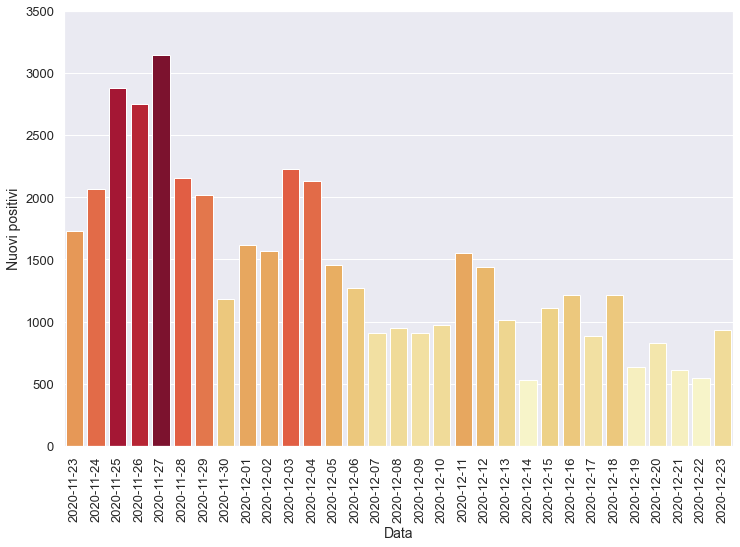

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

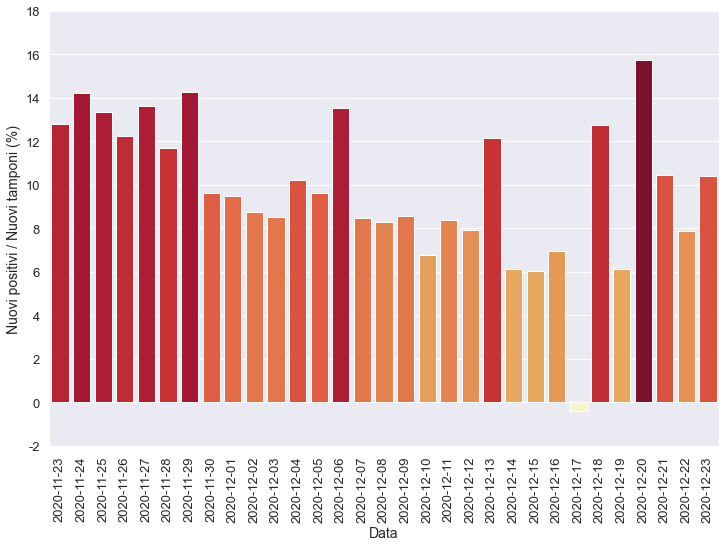

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

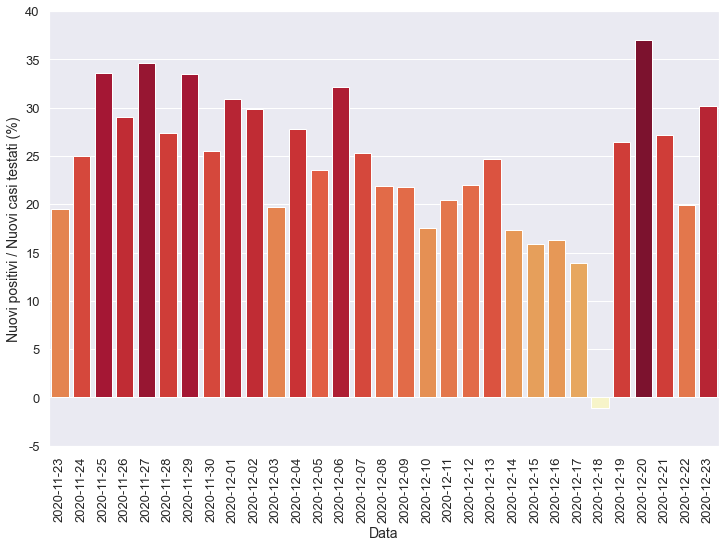

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

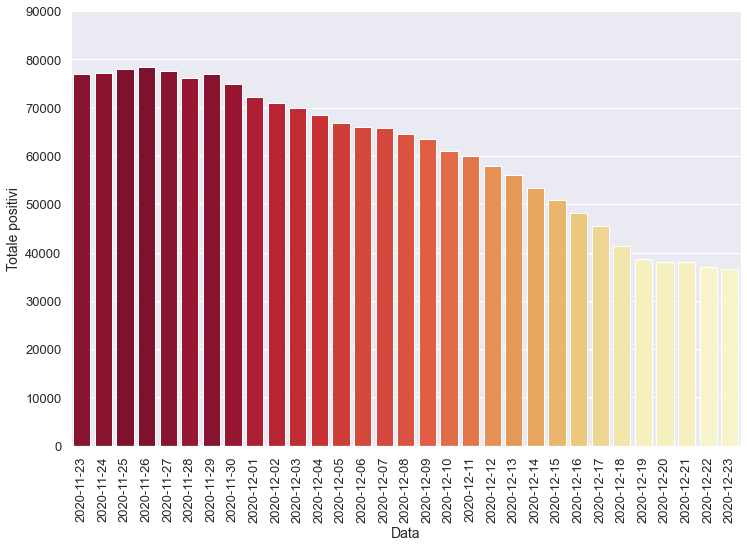

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

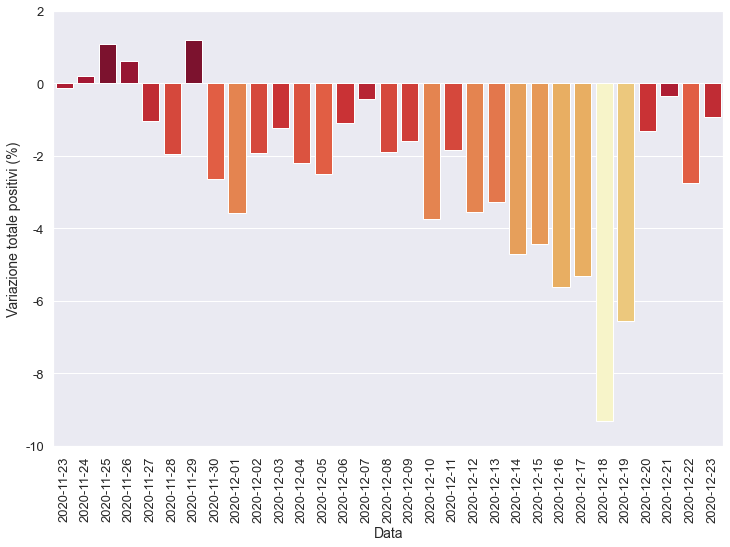

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

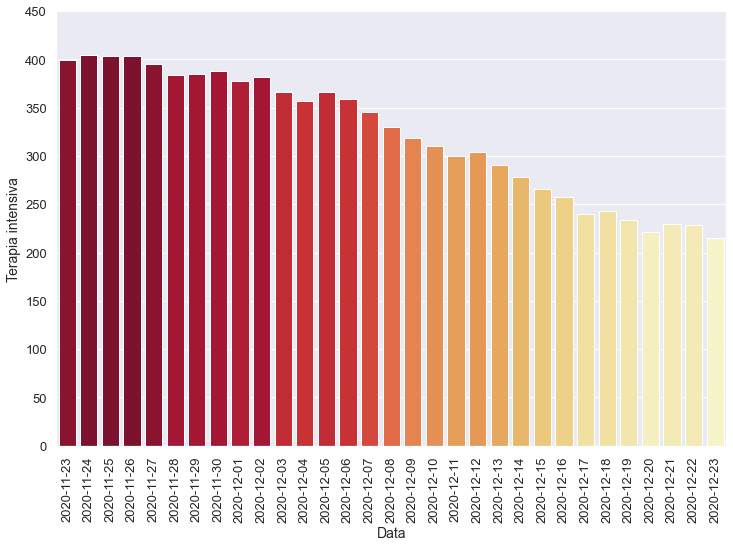

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

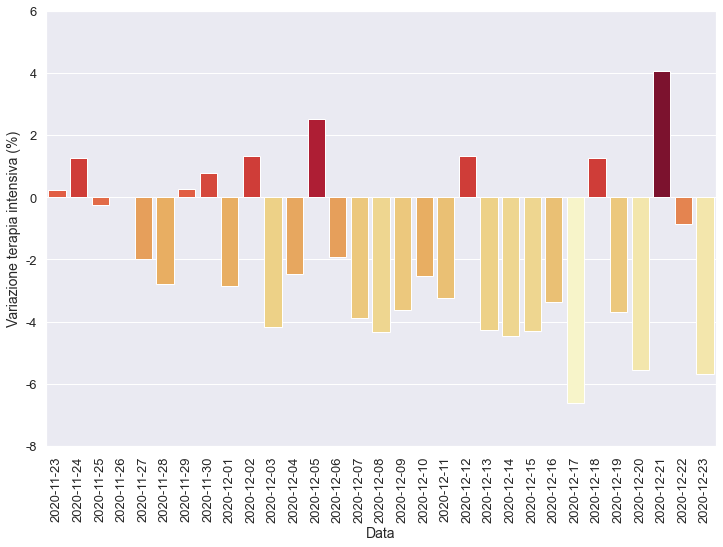

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

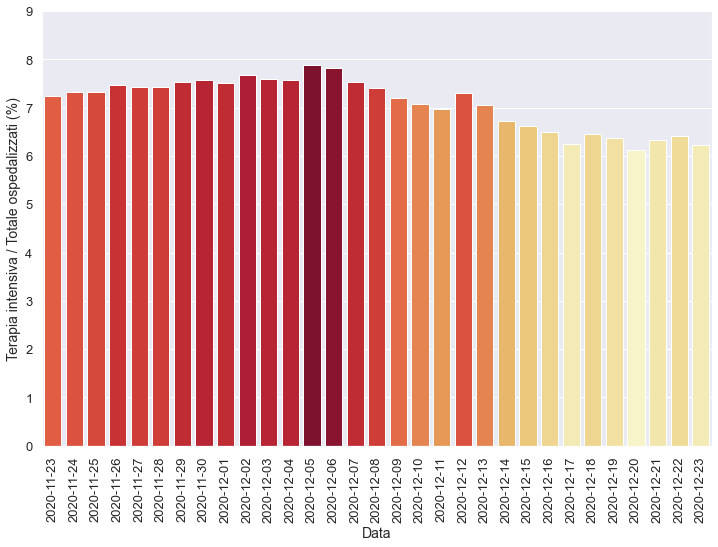

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

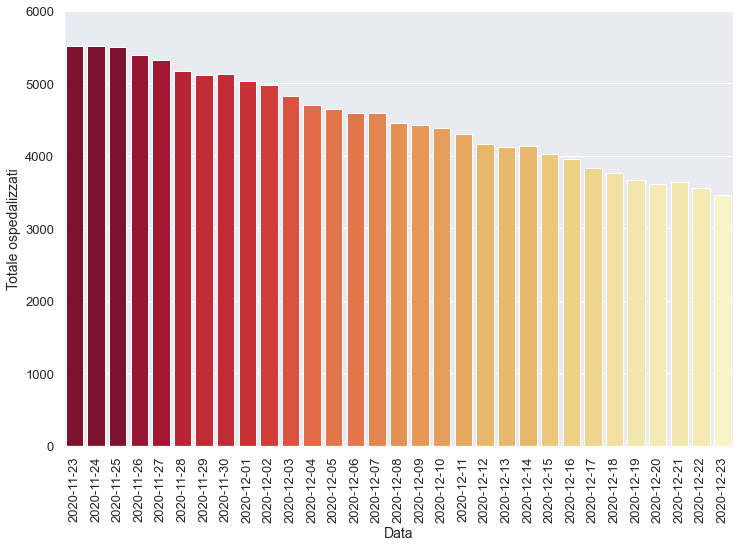

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

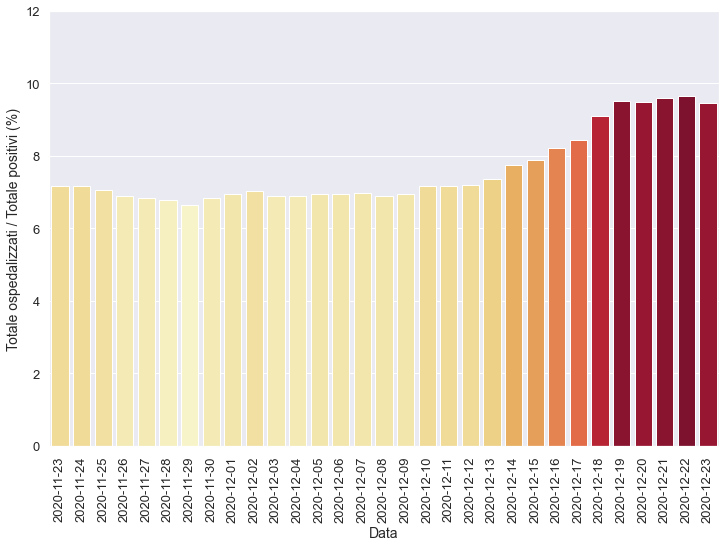

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

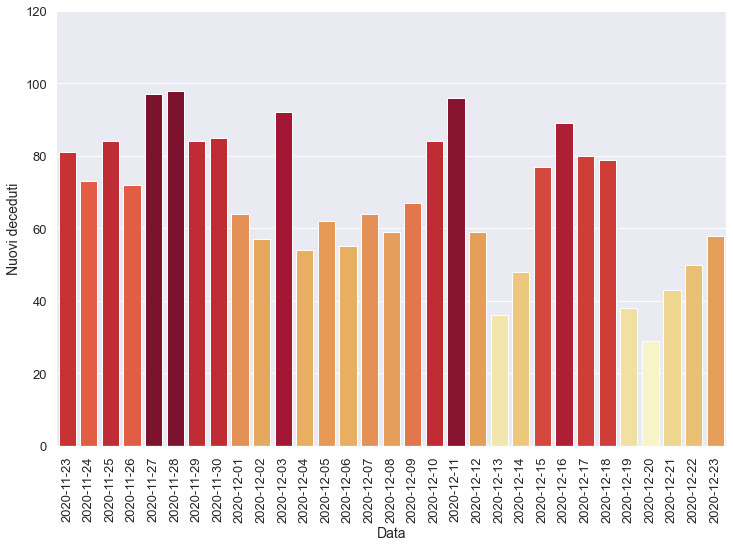

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

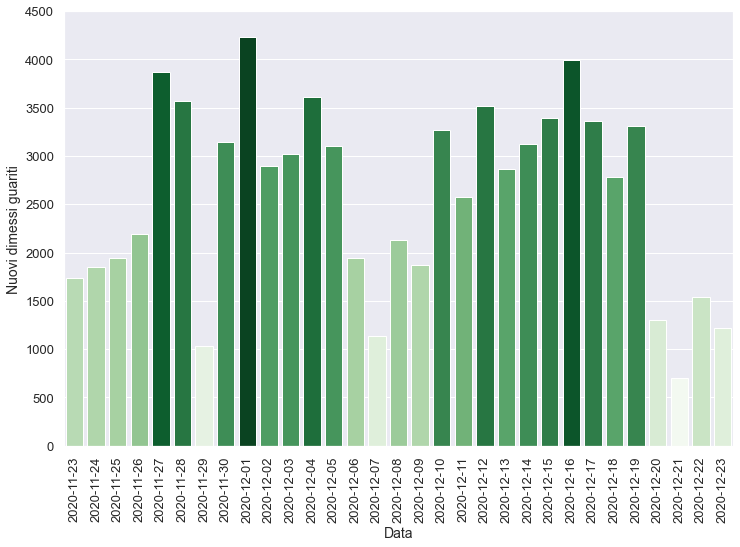

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-16T17:00:00,1,Piemonte,3698,257,3955,44148,48103,-2867,1215,...,89.0,17493.0,7434.0,-2795.0,6.50,8.22,6.95,16.34,-3.38,-5.62
1,2020-12-17T17:00:00,1,Piemonte,3597,240,3837,41706,45543,-2560,883,...,80.0,-215581.0,6334.0,-2442.0,6.25,8.43,-0.41,13.94,-6.61,-5.32
2,2020-12-18T17:00:00,1,Piemonte,3516,243,3759,37541,41300,-4243,1210,...,79.0,9493.0,-106675.0,-4165.0,6.46,9.10,12.75,-1.13,1.25,-9.32
3,2020-12-19T17:00:00,1,Piemonte,3437,234,3671,34922,38593,-2707,638,...,38.0,10421.0,2410.0,-2619.0,6.37,9.51,6.12,26.47,-3.70,-6.55
4,2020-12-20T17:00:00,1,Piemonte,3389,221,3610,34481,38091,-502,829,...,29.0,5269.0,2243.0,-441.0,6.12,9.48,15.73,36.96,-5.56,-1.30
5,2020-12-21T17:00:00,1,Piemonte,3409,230,3639,34318,37957,-134,611,...,43.0,5838.0,2247.0,-163.0,6.32,9.59,10.47,27.19,4.07,-0.35
6,2020-12-22T17:00:00,1,Piemonte,3331,228,3559,33350,36909,-1048,542,...,50.0,6894.0,2718.0,-968.0,6.41,9.64,7.86,19.94,-0.87,-2.76
7,2020-12-23T17:00:00,1,Piemonte,3239,215,3454,33107,36561,-348,933,...,58.0,8946.0,3094.0,-243.0,6.22,9.45,10.43,30.16,-5.70,-0.94


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

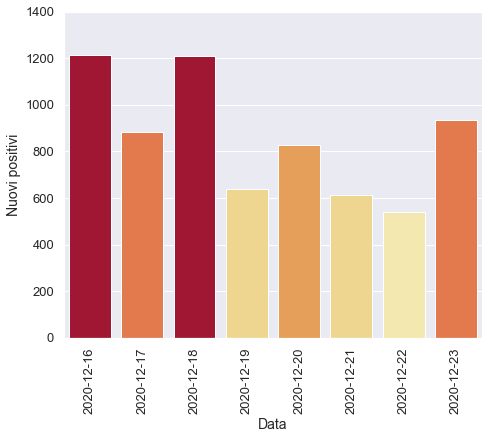

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

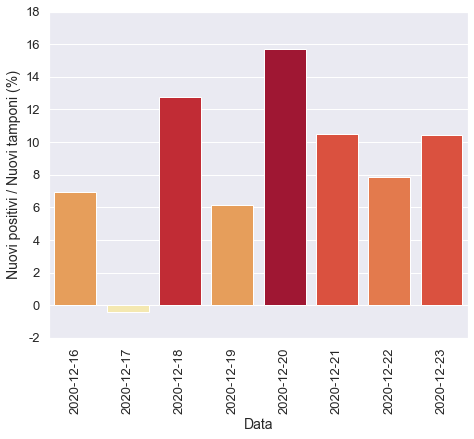

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

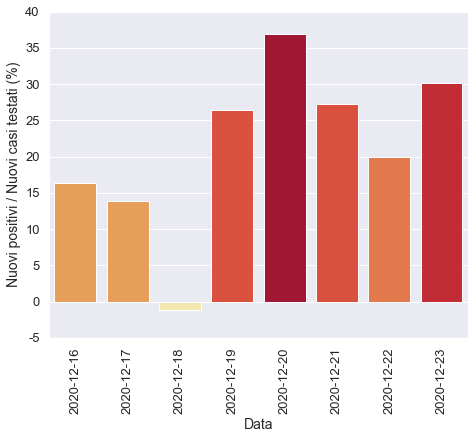

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

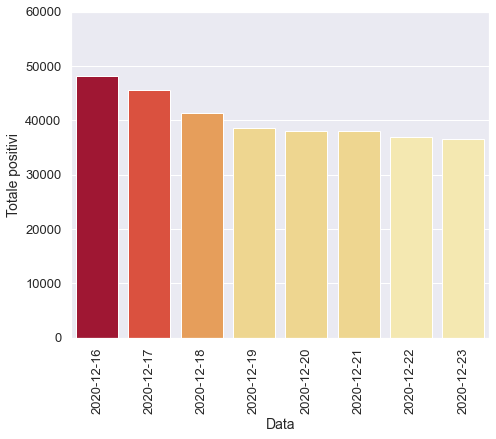

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

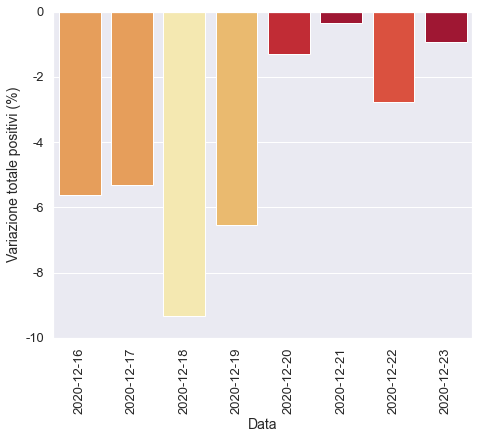

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

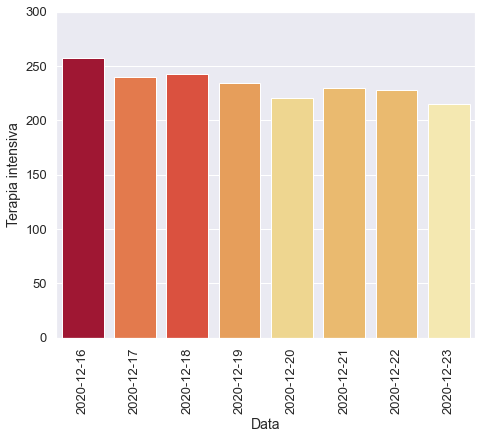

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

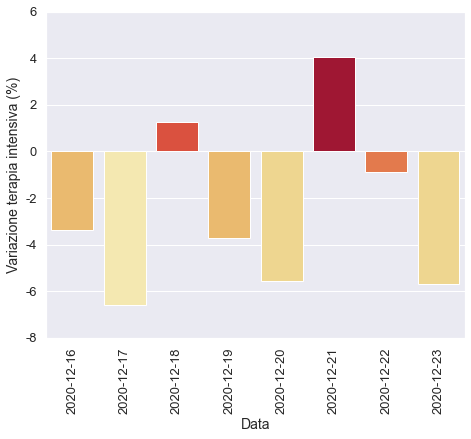

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

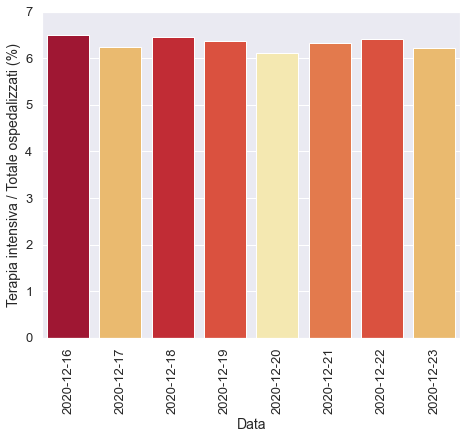

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

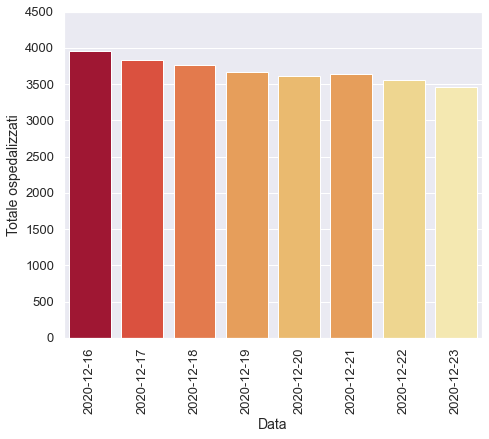

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

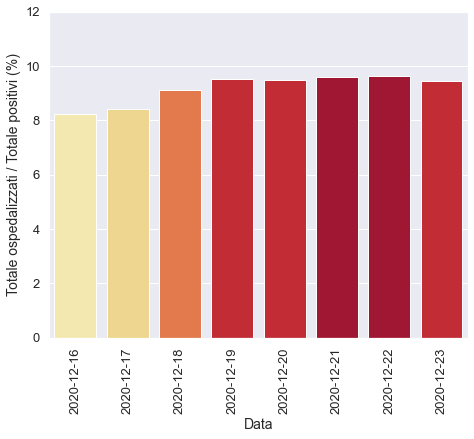

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

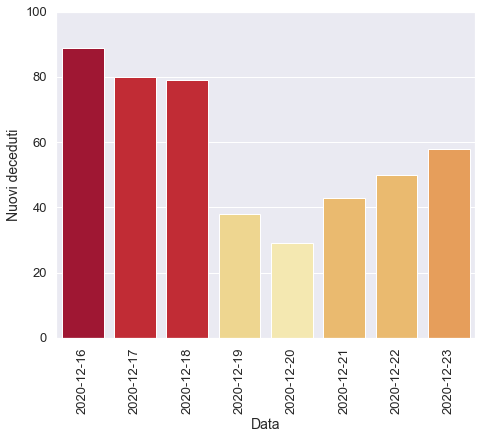

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

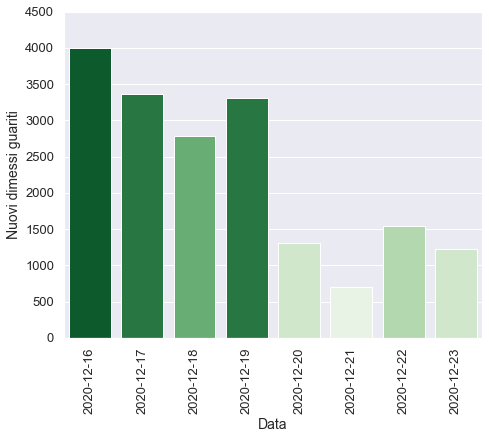

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)